# Linear regression and Radial Basis Function (RBF) variables
Using the Gaussian Radial Basis Function to model non-linear problems using linear regression.

Inspried by Vincent Warmerdan's 2018 PyData talk: https://www.youtube.com/watch?v=68ABAU_V8qI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Create some data
First let's create some synthetic data with a cycle and a trend.

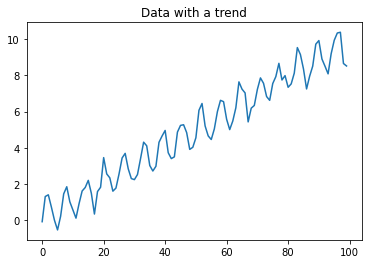

In [2]:
# Create some dummy data and plot it
x = np.arange(100)
y = np.sin(x) + x/10.0 + np.random.normal(0, 0.25, size=(100, 1)).flatten()

plt.title('Data with a trend')
plt.plot(y)
plt.show()

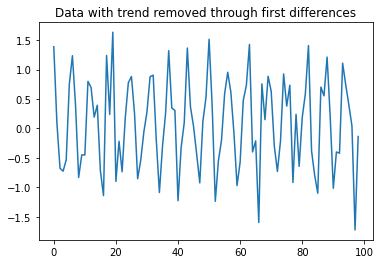

In [3]:
# Apply first differences to remove trend
y_diff = np.array([y[t] - y[t-1] for t, y_ in enumerate(y) if t > 0])

x = x[1:]

plt.title('Data with trend removed through first differences')
plt.plot(y_diff)
plt.show()

### Create RBF variables
Now let's create some RBF variables to add as predictors in our regression model.

In [4]:
def calculate_rbf(x, c, sigma=3.0, mod=None):
    """
    Returns radial basis function given some data and a centroid
    """
    if mod is None:
        return np.exp(-((x - c)**2/sigma**2))
    else:
        return np.exp(-((x % mod - c)**2/sigma**2))


In [5]:
# Split training and test sets
train_percent = 0.6

n_train = int(x.shape[0] * train_percent)

x_train = x[:n_train]
x_test = x[n_train:]

y_train = y_diff[:n_train]
y_test = y_diff[n_train:]

# Check dimensions
print(x_train.shape)
print(x_test.shape)

(59,)
(40,)


In [6]:
# Create RBF variables for training and test sets
start_cycle = 5
cycle_length = 19
sigma = 3.0

x_train_rbf = np.zeros((x_train.shape[0], cycle_length-start_cycle+1))
x_train_rbf[:, 0] = x_train

x_test_rbf = np.zeros((x_test.shape[0], cycle_length-start_cycle+1))
x_test_rbf[:, 0] = x_test

for i, c in enumerate(range(5, cycle_length)):
    x_train_rbf[:, i] = calculate_rbf(x_train, c, sigma=sigma, mod=cycle_length)
    x_test_rbf[:, i] = calculate_rbf(x_test, c, sigma=sigma, mod=cycle_length)

# Check dimensions
print(x_train_rbf.shape)
print(x_test_rbf.shape)

(59, 15)
(40, 15)


In [7]:
# Check the first row of the data
x_train_rbf[0, :]

array([1.69013315e-01, 6.21765240e-02, 1.83156389e-02, 4.32023947e-03,
       8.15987835e-04, 1.23409804e-04, 1.49453385e-05, 1.44927889e-06,
       1.12535175e-07, 6.99704599e-09, 3.48362407e-10, 1.38879439e-11,
       4.43337775e-13, 1.13323932e-14, 0.00000000e+00])

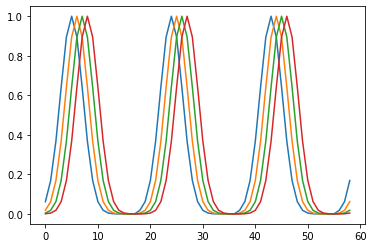

In [8]:
# Inspect a few radial basis function variables
plt.plot(x_train_rbf[:, 1:5])
plt.show()

### Linear Regression Model

In [9]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(x_train_rbf, y_train)

print(lr.coef_, lr.intercept_)

[   106.755636     -738.74570248   2626.73446155  -6496.68480555
  12526.6314425  -19832.74975635  26454.31598465 -30088.76500756
  29208.40387604 -23950.66667445  16180.64781962  -8561.61455877
   3187.97432798   -632.08638836      0.        ] 0.5104706511431552


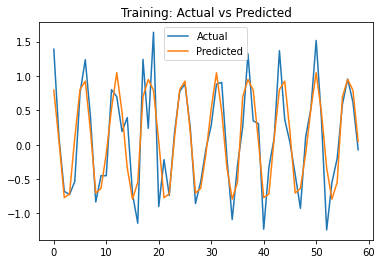

In [10]:
# Plot actual vs predicted for training set
y_train_pred = lr.predict(x_train_rbf)

plt.title("Training: Actual vs Predicted")
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.legend()
plt.show()

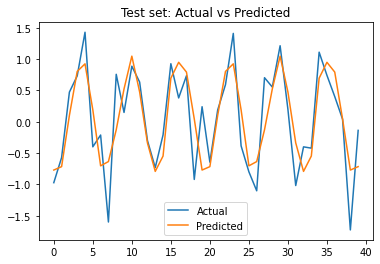

In [11]:
# Plot actual vs predicted on test set
y_test_pred = lr.predict(x_test_rbf)

plt.title("Test set: Actual vs Predicted")
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.legend()
plt.show()

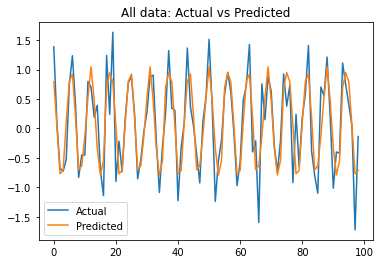

In [12]:
# Plot actual vs predicted for all data
x_all = np.concatenate((x_train_rbf, x_test_rbf), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

y_pred = lr.predict(x_all)

plt.title("All data: Actual vs Predicted")
plt.plot(y_all, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Reconstruct original time series
Next we will reconstruct the orignal time-series data by calculating the cumulative sums of the actuals and predictions.

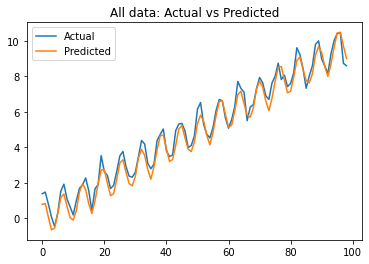

In [13]:
# Calculate cumulative sums and plot
y_all_cum = y_all.cumsum()
y_pred_cum = y_pred.cumsum()

plt.title("All data: Actual vs Predicted")
plt.plot(y_all_cum, label='Actual')
plt.plot(y_pred_cum, label='Predicted')
plt.legend()
plt.show()